In [15]:
import sys
sys.path.insert(1, '/home/BCCRC.CA/ssubedi/projects/experiments/asapp/asapp/')

from util._io import read_config
from collections import namedtuple
from pathlib import Path
import pandas as pd
import numpy as np
import logging
from scannotation import ASAPP
from data._dataloader import DataSet
from util import _topics


import matplotlib.pylab as plt
import seaborn as sns
import colorcet as cc

from data import _sim 
from scipy import stats
from sklearn.metrics import mean_squared_error as mse

import joblib

experiment = '/projects/experiments/asapp/'
server = Path.home().as_posix()
experiment_home = server+experiment
experiment_config = read_config(experiment_home+'config.yaml')
args = namedtuple('Struct',experiment_config.keys())(*experiment_config.values())

dl = DataSet()
dl.config = args
dl.initialize_path()
dl.initialize_data()
dl.load_data()
print(dl.inpath)
print(dl.outpath)
# logging.basicConfig(filename=dl.outpath+'_model.log',
# 						format='%(asctime)s %(levelname)-8s %(message)s',
# 						level=logging.INFO,
# 						datefmt='%Y-%m-%d %H:%M:%S')

# asap = ASAPP(adata=dl,tree_min_leaf=5,tree_max_depth=1000, factorization='MVB',max_iter=10,n_pass=10)
# asap.factorize()
# asap.save_model()

/home/BCCRC.CA/ssubedi/projects/experiments/asapp/data/lung/lung
/home/BCCRC.CA/ssubedi/projects/experiments/asapp/result/lung/lung


In [16]:
asap = joblib.load(dl.outpath+'_model_vb.pkl')

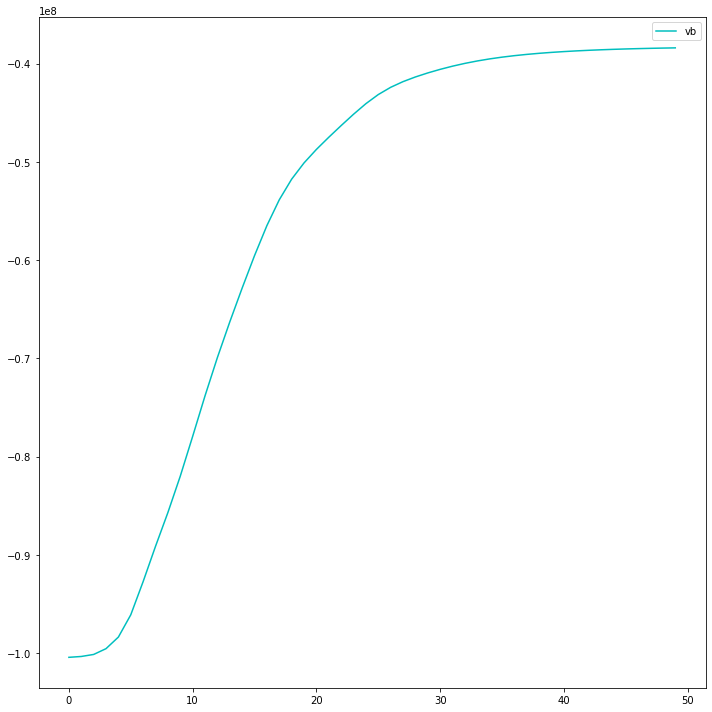

In [17]:
plt.plot(asap.llk,'c',label='vb')
plt.legend()

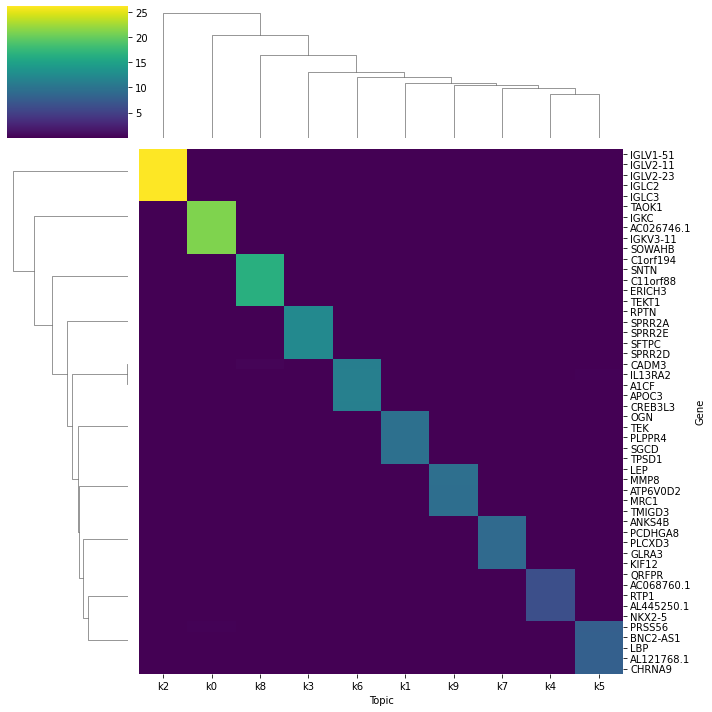

In [18]:
df_beta = pd.DataFrame(asap.Ebeta)
df_beta.columns = dl.cols
df_top = _topics.get_topic_top_genes(df_beta.iloc[:,:],top_n=5)
df_top = df_top.pivot(index='Topic',columns='Gene',values='Proportion')
sns.clustermap(df_top.T,cmap='viridis')

In [19]:
df_pl = pd.read_csv(dl.outpath+'_scanpy_label.csv.gz')
df_pl.columns = ['cell','cell_type','umap1','umap2']

df_pl

,cell,cell_type,umap1,umap2
0,51_ACGCGCCTCCCA_P36,0,16.684597,-6.781860
1,51_GTGCACTATGGT_P36,0,16.627010,-6.485576
2,51_CACATTGTATTC_P36,0,16.407602,-6.933126
3,51_GCGCCGATCTTT_P36,1,2.573044,6.771865
4,51_ACTTGACCCGAG_P36,0,16.830532,-3.339075
...,...,...,...,...
51257,57_TGTCCCATTGGG_P40,0,11.207267,-6.983398
51258,57_TAAACGAGCTCC_P40,0,12.654920,-8.429868
51259,57_GTAGCGAAGACT_P40,0,10.344792,-7.233248
51260,57_TGAGGCGTTAGG_P40,0,10.223881,-7.636713


In [ ]:
df_theta = pd.DataFrame(asap.predicted_params['theta_a']/asap.predicted_params['theta_b'])
df_theta.to_csv(dl.outpath+'_model_theta.csv.gz')

In [20]:
import umap

df_theta = pd.DataFrame(asap.predicted_params['theta_a']/asap.predicted_params['theta_b'])
# df_umap= pd.DataFrame()
# df_umap['cell'] = dl.rows
# df_umap['topic'] = [x for x in df_theta.iloc[:,1:].idxmax(axis=1)]

# umap_2d = umap.UMAP(n_components=2, init='random', random_state=0,min_dist=0.0,metric='cosine')
# proj_2d = umap_2d.fit(df_theta.iloc[:,1:])
# df_umap[['umap1','umap2']] = umap_2d.embedding_[:,[0,1]]
# df_umap


df_umap = pd.read_csv(dl.outpath+'_umap.csv')
df_umap = df_umap.rename(columns={'Unnamed: 0':'cell','V1':'umap1','V2':'umap2'})
df_umap['cell'] = dl.rows
df_umap['topic'] = [x for x in df_theta.iloc[:,1:].idxmax(axis=1)]

df_umap

,cell,umap1,umap2,topic
0,51_TGTCCTAATATG_P36,-7.067419,-1.216538,4
1,51_TTGTTCGTTCAT_P36,-6.375313,0.604083,4
2,51_GCTGCCCTTCAC_P36,-6.463453,0.307654,4
3,51_CAAAAGCTGTAG_P36,-7.009796,-1.039380,4
4,51_CAAAGGAGCAGA_P36,-5.905603,0.669805,4
...,...,...,...,...
62863,57_TGTCCCATTGGG_P40,7.543665,-8.987718,9
62864,57_TAAACGAGCTCC_P40,-0.982895,7.731516,9
62865,57_GTAGCGAAGACT_P40,-2.086605,9.898123,9
62866,57_TGAGGCGTTAGG_P40,-1.300204,9.422955,9


In [21]:

# df_umap = pd.merge(df_umap,df_pl[['cell','cell_type']],on='cell',how='left')
# df_umap = df_umap[~df_umap['cell_type'].isna()]
# df_umap

# df_umap = df_umap[df_umap['umap1']>-15.0]

df_umap = pd.merge(df_umap[['cell','topic']],df_pl,on='cell',how='left')
df_umap = df_umap[~df_umap['cell_type'].isna()]
df_umap

,cell,topic,cell_type,umap1,umap2
18,51_ACGCGCCTCCCA_P36,9,0.0,16.684597,-6.781860
24,51_GTGCACTATGGT_P36,9,0.0,16.627010,-6.485576
28,51_CACATTGTATTC_P36,9,0.0,16.407602,-6.933126
31,51_GCGCCGATCTTT_P36,4,1.0,2.573044,6.771865
32,51_ACTTGACCCGAG_P36,9,0.0,16.830532,-3.339075
...,...,...,...,...,...
62863,57_TGTCCCATTGGG_P40,9,0.0,11.207267,-6.983398
62864,57_TAAACGAGCTCC_P40,9,0.0,12.654920,-8.429868
62865,57_GTAGCGAAGACT_P40,9,0.0,10.344792,-7.233248
62866,57_TGAGGCGTTAGG_P40,9,0.0,10.223881,-7.636713


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Text(0.5, 1.0, 'ASAP')

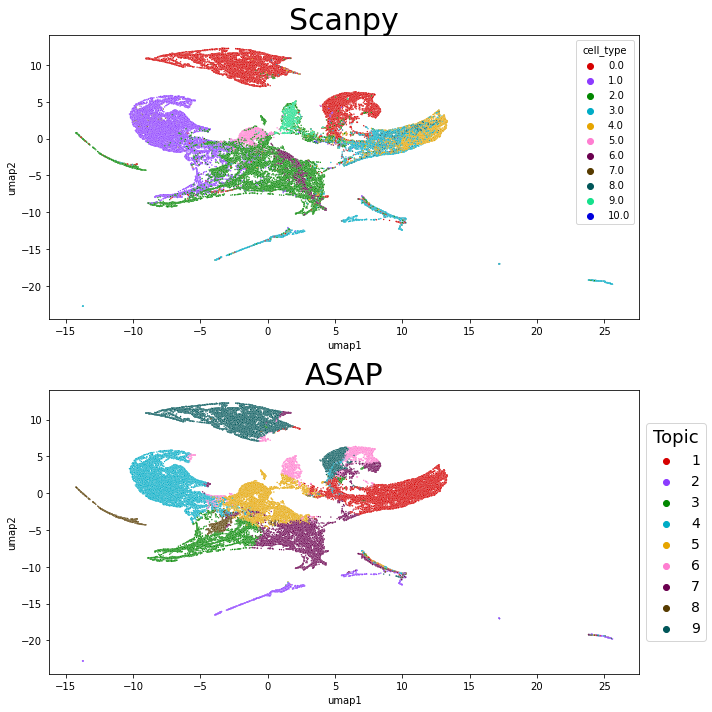

In [14]:
plt.rcParams["figure.figsize"] = (10,10)
figure,axis = plt.subplots(2,1)


cp = sns.color_palette(cc.glasbey_dark, n_colors=len(df_umap['cell_type'].unique()))
p = sns.scatterplot(data=df_umap, x='umap1', y='umap2', hue='cell_type',s=2,palette=cp,legend=True,ax=axis[0])
plt.legend(title='Topic',title_fontsize=18, fontsize=14,loc='center left', bbox_to_anchor=(1, 0.5))
p.axes.set_title("Scanpy",fontsize=30)


cp = sns.color_palette(cc.glasbey_dark, n_colors=len(df_umap['topic'].unique()))
p = sns.scatterplot(data=df_umap, x='umap1', y='umap2', hue='topic',s=2,palette=cp,legend=True)
plt.legend(title='Topic',title_fontsize=18, fontsize=14,loc='center left', bbox_to_anchor=(1, 0.5))
p.axes.set_title("ASAP",fontsize=30)

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Text(0.5, 1.0, 'ASAP')

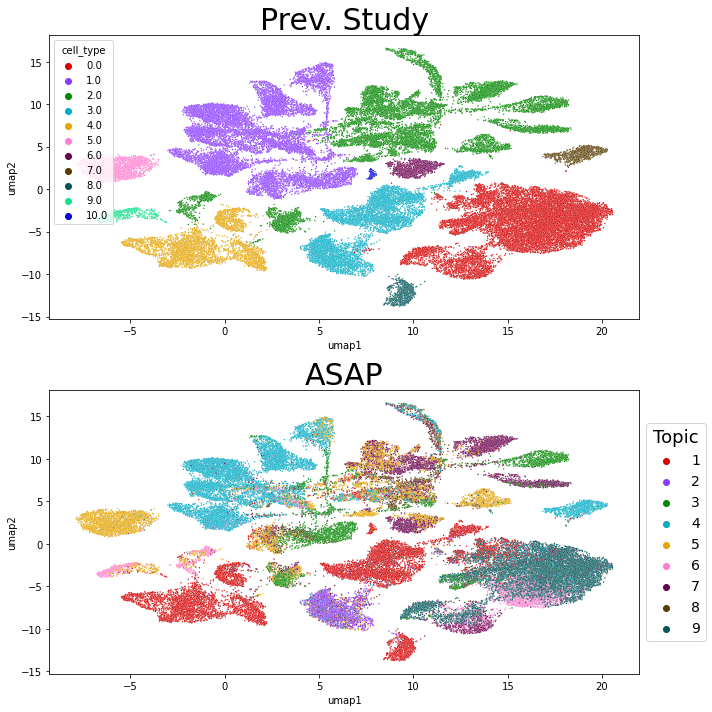

In [54]:
plt.rcParams["figure.figsize"] = (10,10)
figure,axis = plt.subplots(2,1)


cp = sns.color_palette(cc.glasbey_dark, n_colors=len(df_umap['cell_type'].unique()))
p = sns.scatterplot(data=df_umap, x='umap1', y='umap2', hue='cell_type',s=2,palette=cp,legend=True,ax=axis[0])
plt.legend(title='Topic',title_fontsize=18, fontsize=14,loc='center left', bbox_to_anchor=(1, 0.5))
p.axes.set_title("Prev. Study",fontsize=30)


cp = sns.color_palette(cc.glasbey_dark, n_colors=len(df_umap['topic'].unique()))
p = sns.scatterplot(data=df_umap, x='umap1', y='umap2', hue='topic',s=2,palette=cp,legend=True)
plt.legend(title='Topic',title_fontsize=18, fontsize=14,loc='center left', bbox_to_anchor=(1, 0.5))
p.axes.set_title("ASAP",fontsize=30)



Text(224.82954545454544, 0.5, 'cell_type')

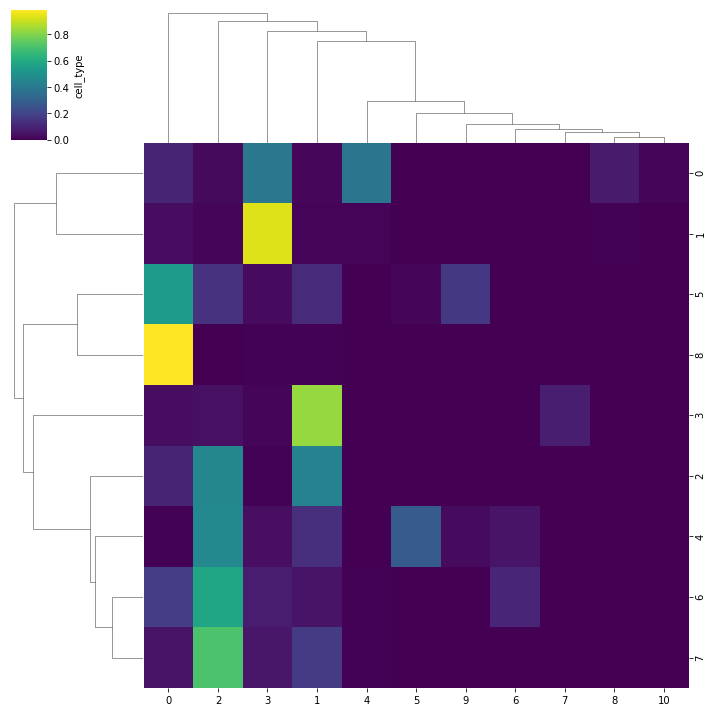

In [9]:
from sklearn.metrics.cluster import contingency_matrix
df_rmatch = pd.DataFrame(contingency_matrix(df_umap.topic,df_umap.cell_type))
# df_rmatch = pd.DataFrame(contingency_matrix(df_umap.topic_sc_ct,df_umap.topic_blk_ct))
df_rmatch = df_rmatch.div(df_rmatch.sum(axis=1), axis=0)
sns.clustermap(df_rmatch,cmap='viridis')
plt.xlabel('sc')
plt.ylabel('cell_type')


In [36]:
df_grp = df_umap.groupby(['topic','cell_type'])['cell_type'].size().rename('count').reset_index()
celltype_sum = dict(df_grp.groupby('topic')['count'].sum())
df_grp['ncount'] = [x/celltype_sum[y] for x,y in zip(df_grp['count'],df_grp['topic'])]
df_grp['topic'] =  df_grp['topic'].astype(int)
df_grp.to_csv(dl.outpath+'_r1_topic_ct_dist.csv.gz',index=False, compression='gzip')

In [22]:

def marker_genes(fn,mtx,rows,cols,df_umap):

	from anndata import AnnData
	import scanpy as sc
	import numpy as np

	adata = AnnData(mtx)
	sc.pp.normalize_total(adata, target_sum=1e4)
	sc.pp.log1p(adata)
	dfn = adata.to_df()
	dfn.columns = cols
	dfn['cell'] = rows

	dfn = pd.merge(dfn,df_umap[['cell','umap1','umap2']],on='cell',how='left')

	return dfn
dfn = marker_genes(dl.outpath,dl.mtx,dl.rows,dl.cols,df_umap)

In [23]:
def plot_marker_genes(fn,dfn,marker_genes):

	import matplotlib.pylab as plt
	plt.rcParams['figure.figsize'] = [10, 5]
	plt.rcParams['figure.autolayout'] = True
	import seaborn as sns

	fig, ax = plt.subplots(2,3) 
	ax = ax.ravel()

	for i,g in enumerate(marker_genes):
		if g in dfn.columns:
			print(g)
			val = np.array([x if x<3 else 3.0 for x in dfn[g]])
			sns.scatterplot(data=dfn, x='umap1', y='umap2', hue=val,s=.1,palette="viridis",ax=ax[i],legend=False)

			norm = plt.Normalize(val.min(), val.max())
			sm = plt.cm.ScalarMappable(cmap="viridis",norm=norm)
			sm.set_array([])

			# cax = fig.add_axes([ax[i].get_position().x1, ax[i].get_position().y0, 0.01, ax[i].get_position().height])
			fig.colorbar(sm,ax=ax[i])
			ax[i].axis('off')

			ax[i].set_title(g)
	# fig.savefig(fn+'_umap_marker_genes.png',dpi=600);plt.close()

COL1A1
COL1A2
DCN
CLDN5
VWF
PECAM1


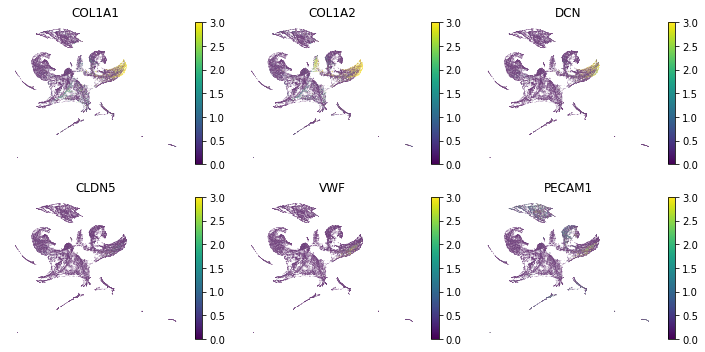

In [12]:
marker_genes = ['COL1A1', 'COL1A2', 'DCN','CLDN5', 'VWF', 'PECAM1']
plot_marker_genes(dl.outpath,dfn,marker_genes)

CD2
CD79A
CD79B
CD14
LYZ
EPCAM


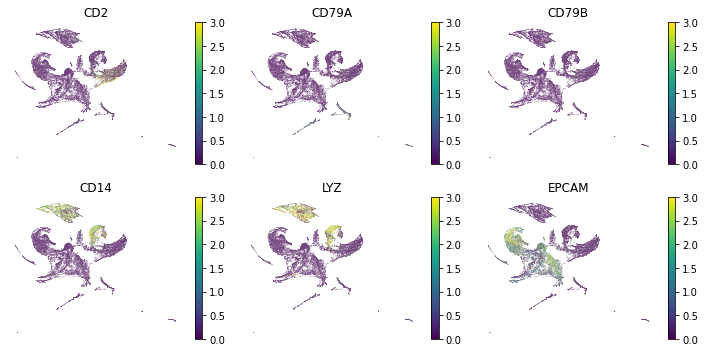

In [13]:
marker_genes = ['CD2','CD79A', 'CD79B','CD14', 'LYZ','EPCAM']
plot_marker_genes(dl.outpath,dfn,marker_genes)

CD2
CD79A
CD79B
CD14
LYZ
EPCAM


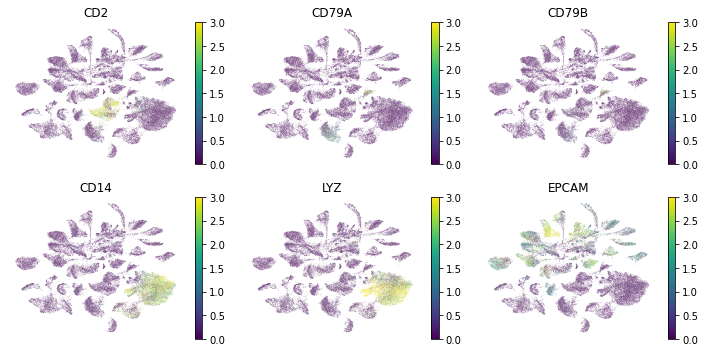

In [26]:
marker_genes = ['CD2','CD79A', 'CD79B','CD14', 'LYZ','EPCAM']
plot_marker_genes(dl.outpath,dfn,marker_genes)

COL1A1
COL1A2
DCN
CLDN5
VWF
PECAM1


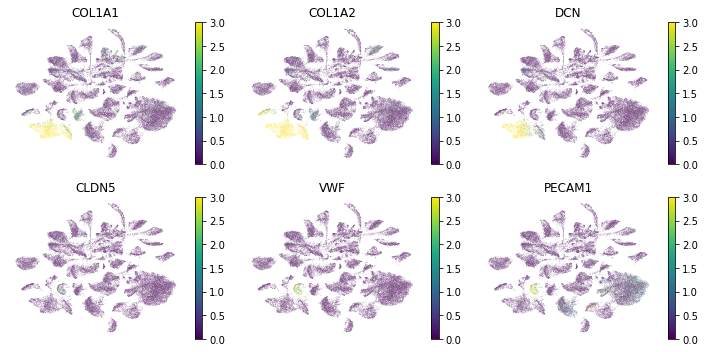

In [25]:
marker_genes = ['COL1A1', 'COL1A2', 'DCN','CLDN5', 'VWF', 'PECAM1']
plot_marker_genes(dl.outpath,dfn,marker_genes)